### Name : PRIYASHAN BWS
### Index : 190476V

In [2]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from plyfile import PlyData,PlyElement
%matplotlib inline 

#### Question 1

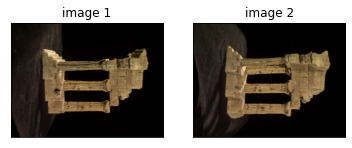

In [10]:
f = open(r'./templeSparseRing/templeSR_par.txt','r')
assert f is not None
n = int (f.readline())

l = f.readline().split()
im1_fn = l[0]

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

l = f.readline().split()
im2_fn = l[0]
 
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

im1 =  cv2.imread(r'./templeSparseRing/'+ im1_fn , cv2.IMREAD_COLOR)
im2 =  cv2.imread(r'./templeSparseRing/'+ im2_fn , cv2.IMREAD_COLOR)
fig , ax =  plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax[0].set_title('image 1')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
ax[1].set_title('image 2')
ax[1].set_xticks([]), ax[1].set_yticks([])

P1 = K1 @ np.hstack((R1,t1)) 
P2 = K2 @ np.hstack((R2,t2))  

#### Question 2

In [5]:
from scipy.linalg import null_space 

def skew(x):
    x = x.ravel()
    return np.array ([[0, -x[2], x[1]],[x[2], 0, -x[0]], [-x[1], x[0],0]])

C = null_space(P1) 
C = C * np.sign(C[0,0])

e2 = P2 @ C

e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)
print(F)

[[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


#### Question 3

([], [])

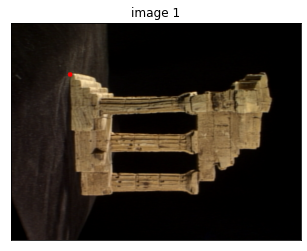

In [11]:
x = np.array([130, 115,1])

cv2.circle(im1 , (x[0], x[1]), 5 , (0,0,255),-1)
fig , ax =  plt.subplots()
ax.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax.set_title('image 1')
ax.set_xticks([]), ax.set_yticks([])


([], [])

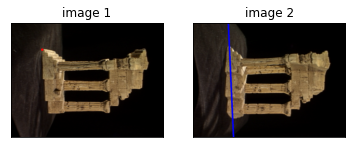

In [12]:
l2 = F @ x.T
p1 = np.array([0, (l2 [0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)

cv2.line(im2, (p1[0],p1[1]),(p2[0], p2[1]),(255,0,0),5)

fig , ax =  plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax[0].set_title('image 1')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
ax[1].set_title('image 2')
ax[1].set_xticks([]), ax[1].set_yticks([])

#### Question 4

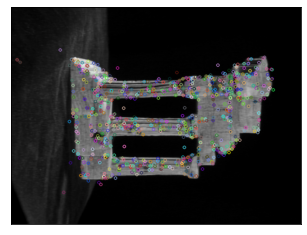

In [13]:
im1 =  cv2.imread(r'./templeSparseRing/'+ im1_fn , cv2.IMREAD_COLOR)

gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(im1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,im1)
plt.imshow(img_1)

plt.xticks([]), plt.yticks([])
plt.show()

([], [])

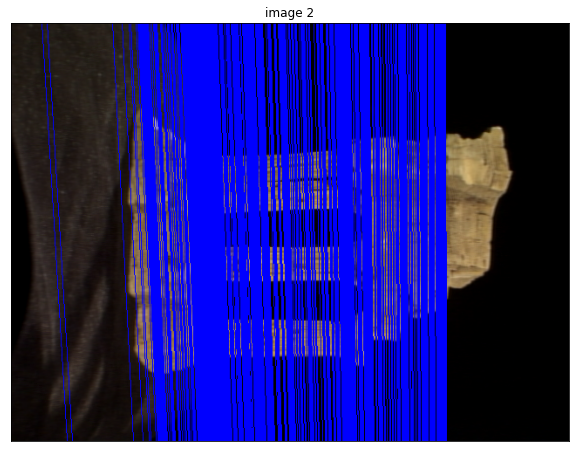

In [14]:
im2 =  cv2.imread(r'./templeSparseRing/'+ im2_fn , cv2.IMREAD_COLOR)

for x in keypoints_1:
   x = np.array([x.pt[0], x.pt[1],1])
   l2 = F @ x
   p1 = np.array([0, (l2 [0]*0 + l2[2])/l2[1]]).astype(int)
   p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)

   cv2.line(im2, (p1[0],p1[1]),(p2[0], p2[1]),(255,0,0),1)

fig, ax = plt.subplots(figsize = (10,9))

ax.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
ax.set_title('image 2')
ax.set_xticks([]), ax.set_yticks([])